In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import trim_mean
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv('student_habits_performance.csv')

In [4]:
df.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [5]:
len(df)

1000

In [6]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [7]:
df.shape

(1000, 16)

In [8]:
df.isna().mean().sort_values(ascending=False)

,0
parental_education_level,0.091
student_id,0.000
gender,0.000
age,0.000
social_media_hours,0.000
netflix_hours,0.000
part_time_job,0.000
study_hours_per_day,0.000
attendance_percentage,0.000
sleep_hours,0.000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [10]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [11]:
df.describe(include = "object")

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,909,1000,1000
unique,1000,3,2,3,3,3,2
top,S1999,Female,No,Fair,High School,Good,No
freq,1,481,785,437,392,447,682


In [12]:
object_cols = []
for col in df.columns[1:]:
    if df[col].dtypes == "object":
        object_cols.append(col)

for i in object_cols:
    print(df[i].value_counts())
    print("-"*30)

gender
Female    481
Male      477
Other      42
Name: count, dtype: int64
------------------------------
part_time_job
No     785
Yes    215
Name: count, dtype: int64
------------------------------
diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64
------------------------------
parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64
------------------------------
internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64
------------------------------
extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64
------------------------------


In [13]:
df.nunique()

,0
student_id,1000
age,8
gender,3
study_hours_per_day,78
social_media_hours,60
netflix_hours,51
part_time_job,2
attendance_percentage,320
sleep_hours,68
diet_quality,3


In [14]:
df['diet_quality'].value_counts(dropna=False)

,count
diet_quality,
Fair,437
Good,378
Poor,185


Text(0.5, 0, 'Count')

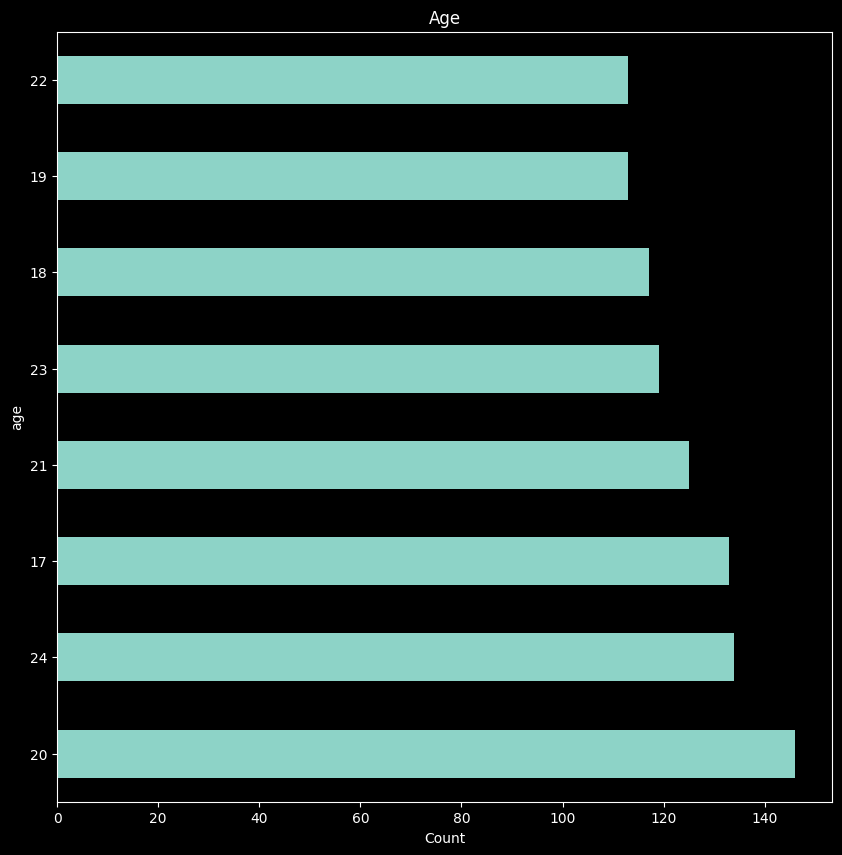

In [15]:
# Figure size
plt.figure(figsize=(10,10))

df['age'].value_counts().plot.barh()

# Aesthetics
plt.title('Age')
plt.xlabel('Count')

In [16]:
df[df['exam_score'] >= 90]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0
22,S1022,18,Other,4.9,2.3,0.6,No,84.5,6.0,Fair,3,High School,Average,7,No,98.7
49,S1049,22,Female,6.1,2.5,2.3,No,100.0,5.8,Poor,5,High School,Average,1,No,96.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,S1945,23,Male,6.0,2.9,2.1,Yes,98.9,6.4,Poor,0,NaN,Average,7,No,100.0
951,S1951,20,Female,3.3,2.2,0.9,No,76.7,8.7,Good,5,Bachelor,Poor,10,No,94.0
960,S1960,17,Male,7.1,1.9,1.1,Yes,69.3,5.6,Good,6,High School,Average,6,No,100.0
972,S1972,17,Female,4.5,0.4,3.0,No,100.0,5.5,Fair,3,High School,Good,8,No,91.9


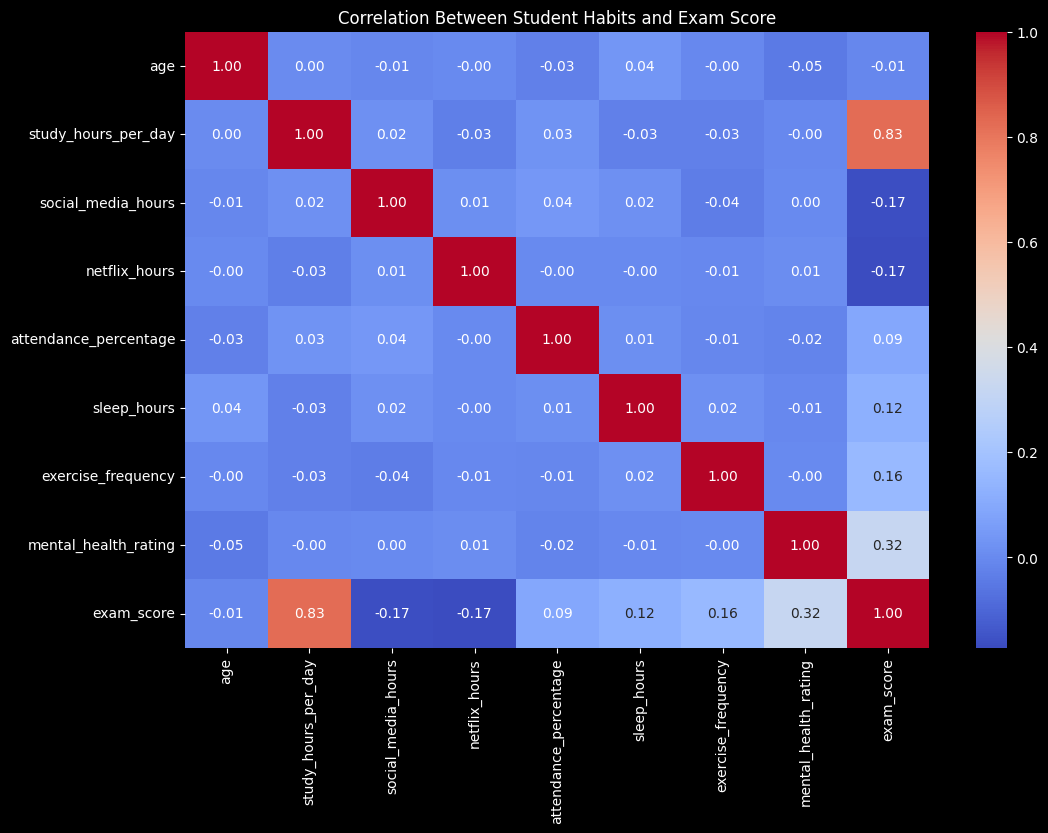

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Student Habits and Exam Score')
plt.show()

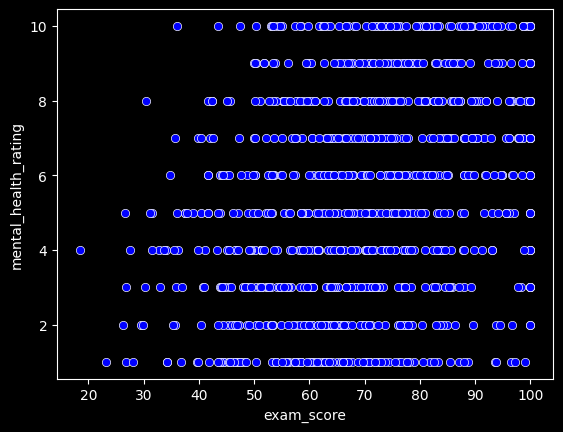

In [18]:
sns.scatterplot(x = df["exam_score"], y = df["mental_health_rating"], marker = "o", color = "b")
plt.show()

In [19]:
model_mental_score = df.groupby('mental_health_rating')['exam_score'].agg(['count','mean'])

In [20]:
model_mental_score

,count,mean
mental_health_rating,,
1,102,62.370588
2,94,63.417021
3,105,64.475238
4,110,65.685455
5,99,66.769697
6,108,71.092593
7,91,74.273626
8,105,74.565714
9,87,76.889655


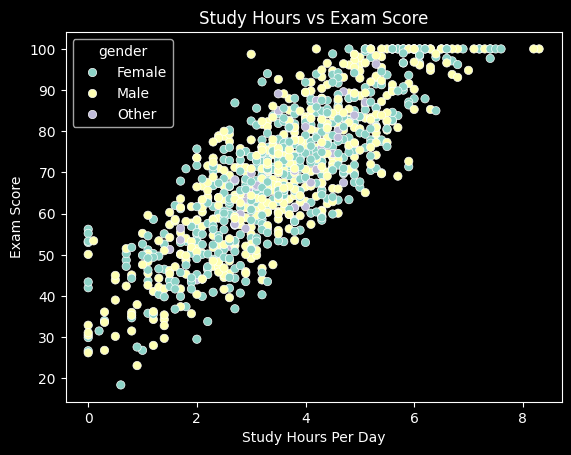

In [21]:
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='gender')
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Exam Score')
plt.show()

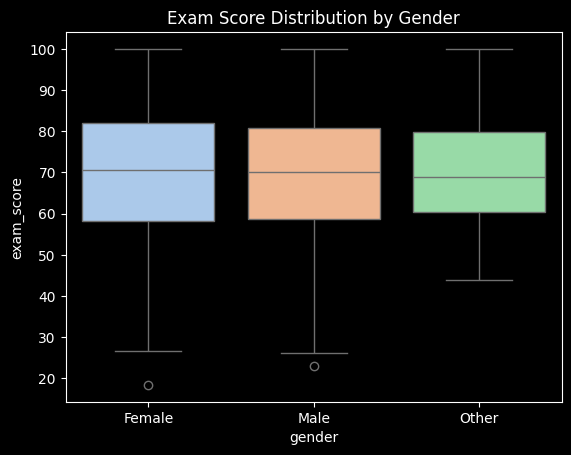

In [22]:
sns.boxplot(data=df, x='gender', y='exam_score', palette='pastel')
plt.title('Exam Score Distribution by Gender')
plt.show()

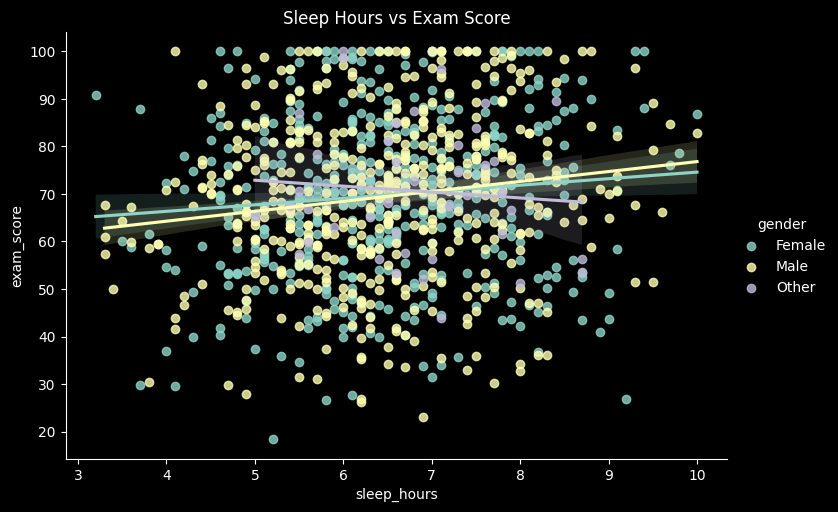

In [23]:
sns.lmplot(data=df, x='sleep_hours', y='exam_score', hue='gender', aspect=1.5)
plt.title('Sleep Hours vs Exam Score')
plt.show()

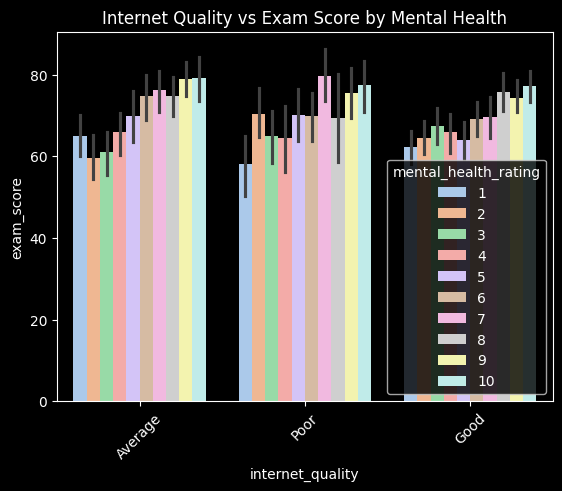

In [24]:
sns.barplot(data=df, x='internet_quality', y='exam_score', hue='mental_health_rating', palette='pastel')
plt.title('Internet Quality vs Exam Score by Mental Health')
plt.xticks(rotation=45)
plt.show()

In [25]:
bins = [0, 1, 2, 3, 4, 5, 6, 8, 10]  # примерные границы
df['study_hours_bin'] = pd.cut(df['study_hours_per_day'], bins=bins)

In [26]:
model_study_score = df.groupby('study_hours_bin')['exam_score'].agg(['count','mean','median'])

In [27]:
model_study_score

,count,mean,median
study_hours_bin,,,
"(0, 1]",31,39.722581,39.00
"(1, 2]",110,49.745455,50.15
"(2, 3]",205,60.386829,60.60
"(3, 4]",276,70.101087,70.65
"(4, 5]",210,78.891905,78.45
"(5, 6]",111,88.029730,88.70
"(6, 8]",42,97.661905,100.00
"(8, 10]",2,100.000000,100.00


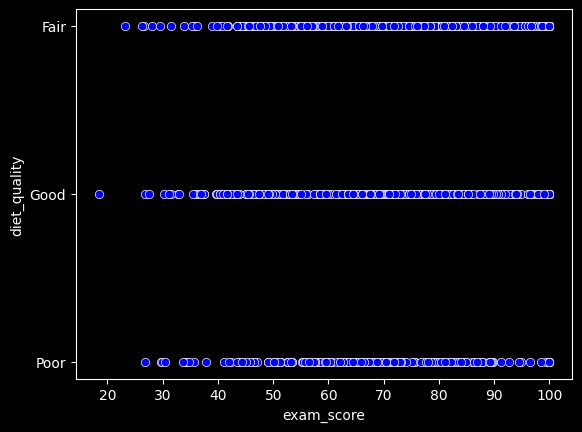

In [28]:
sns.scatterplot(x = df["exam_score"], y = df["diet_quality"], marker = "o", color = "b")
plt.show()

In [29]:
df.groupby('diet_quality')['exam_score'].agg(['count','mean','median'])

,count,mean,median
diet_quality,,,
Fair,437,70.428833,71.0
Good,378,69.366402,70.3
Poor,185,68.127568,67.4


In [30]:
df.groupby('netflix_hours')['exam_score'].agg(['count','mean','median'])

,count,mean,median
netflix_hours,,,
0.0,59,75.728814,77.90
0.1,12,72.708333,70.05
0.2,11,78.972727,83.30
0.3,17,75.370588,72.30
0.4,17,76.405882,72.90
0.5,21,73.028571,73.50
0.6,19,74.710526,74.30
0.7,28,68.842857,67.70
0.8,21,70.866667,75.10


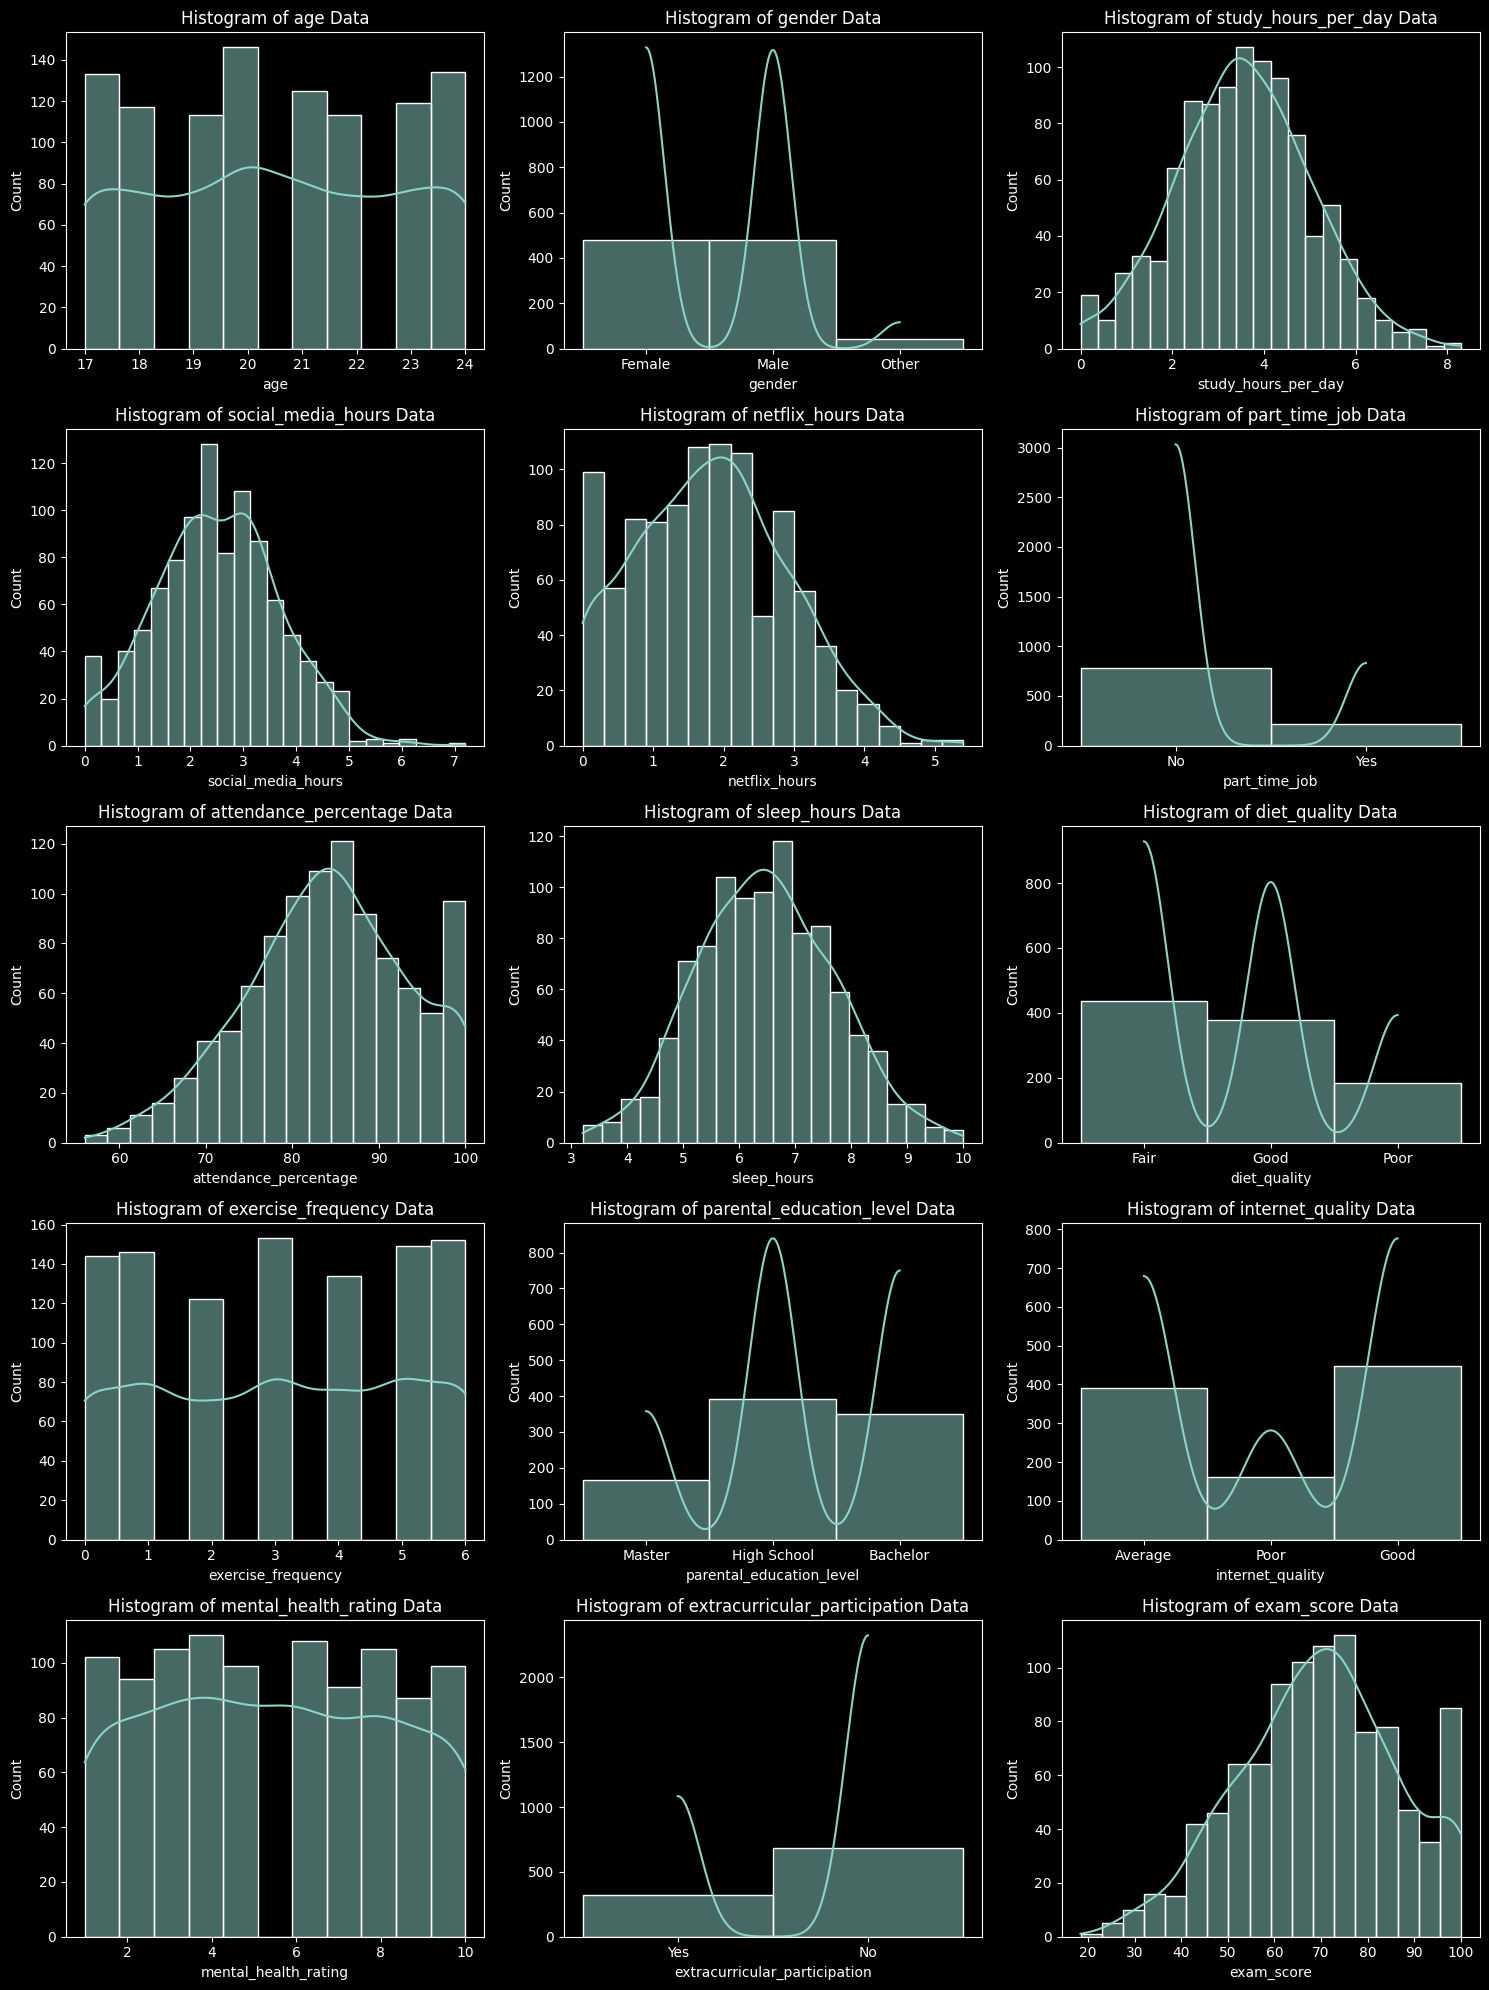

In [31]:
plt.figure(figsize = (15, 20))
for i, col in enumerate(df.columns[1:16], 1):
    plt.subplot(5, 3, i)
    sns.histplot(x = df[col], kde = True)
    plt.title(f"Histogram of {col} Data")
    plt.tight_layout()
    plt.plot()

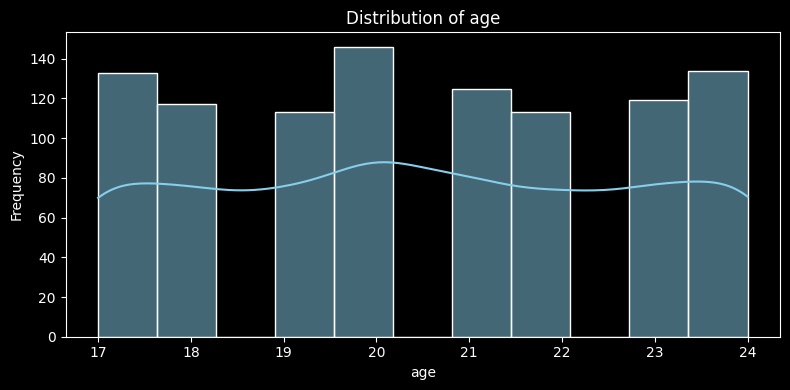

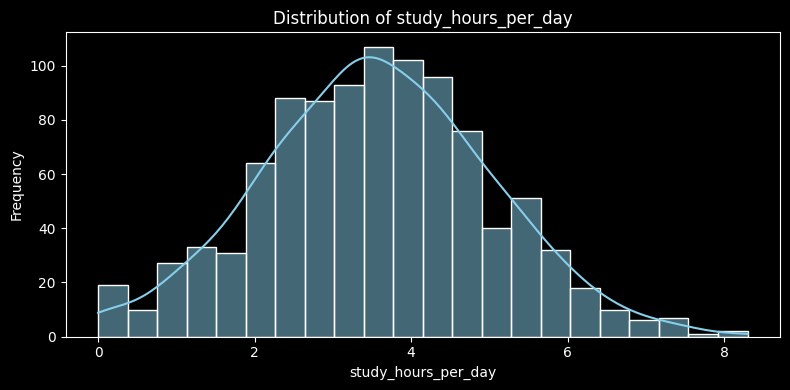

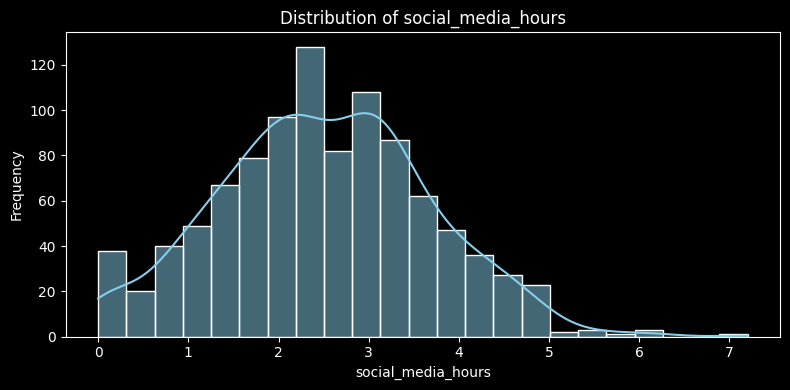

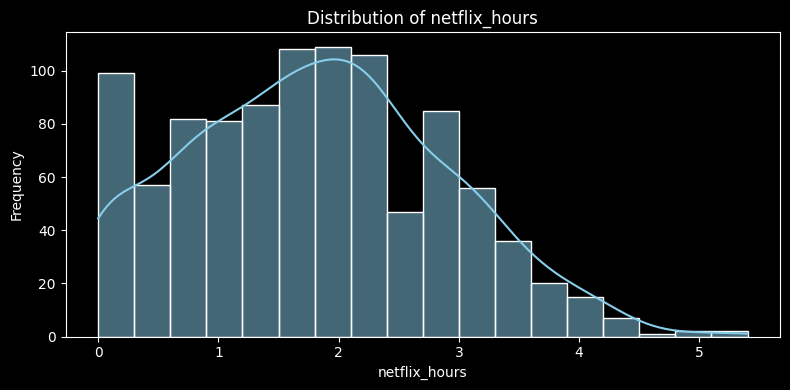

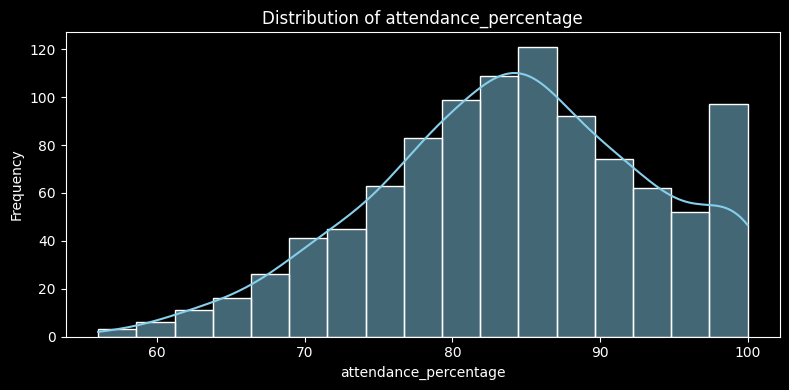

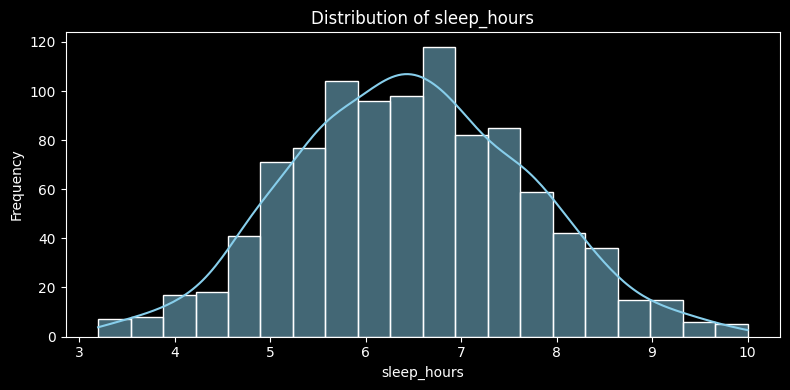

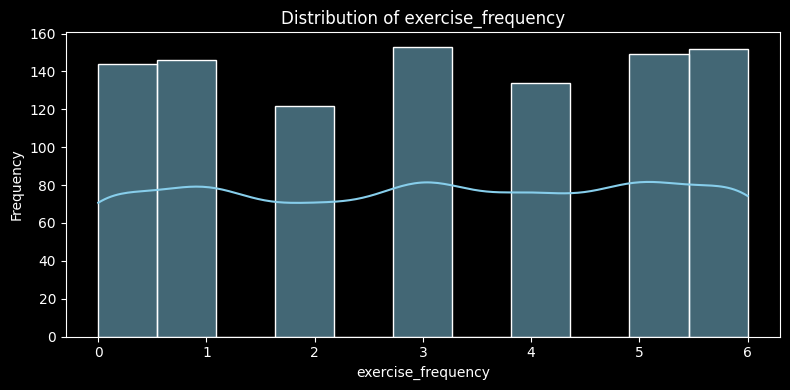

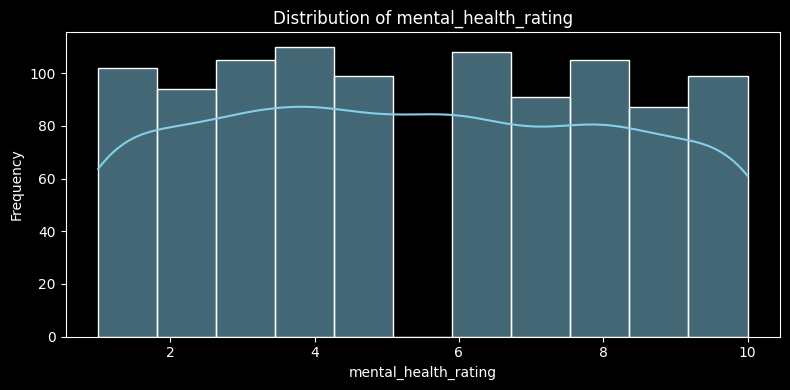

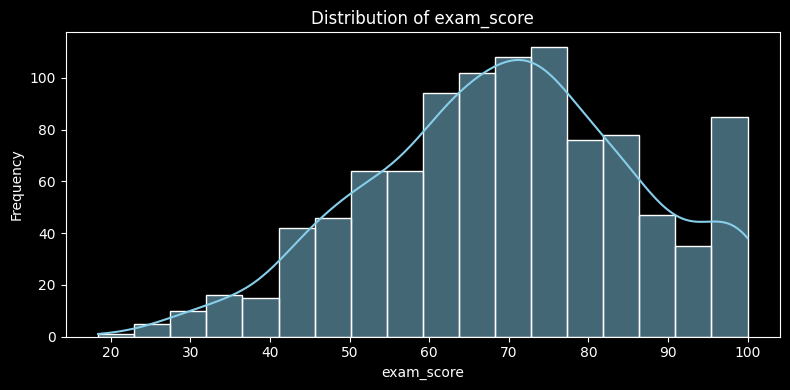

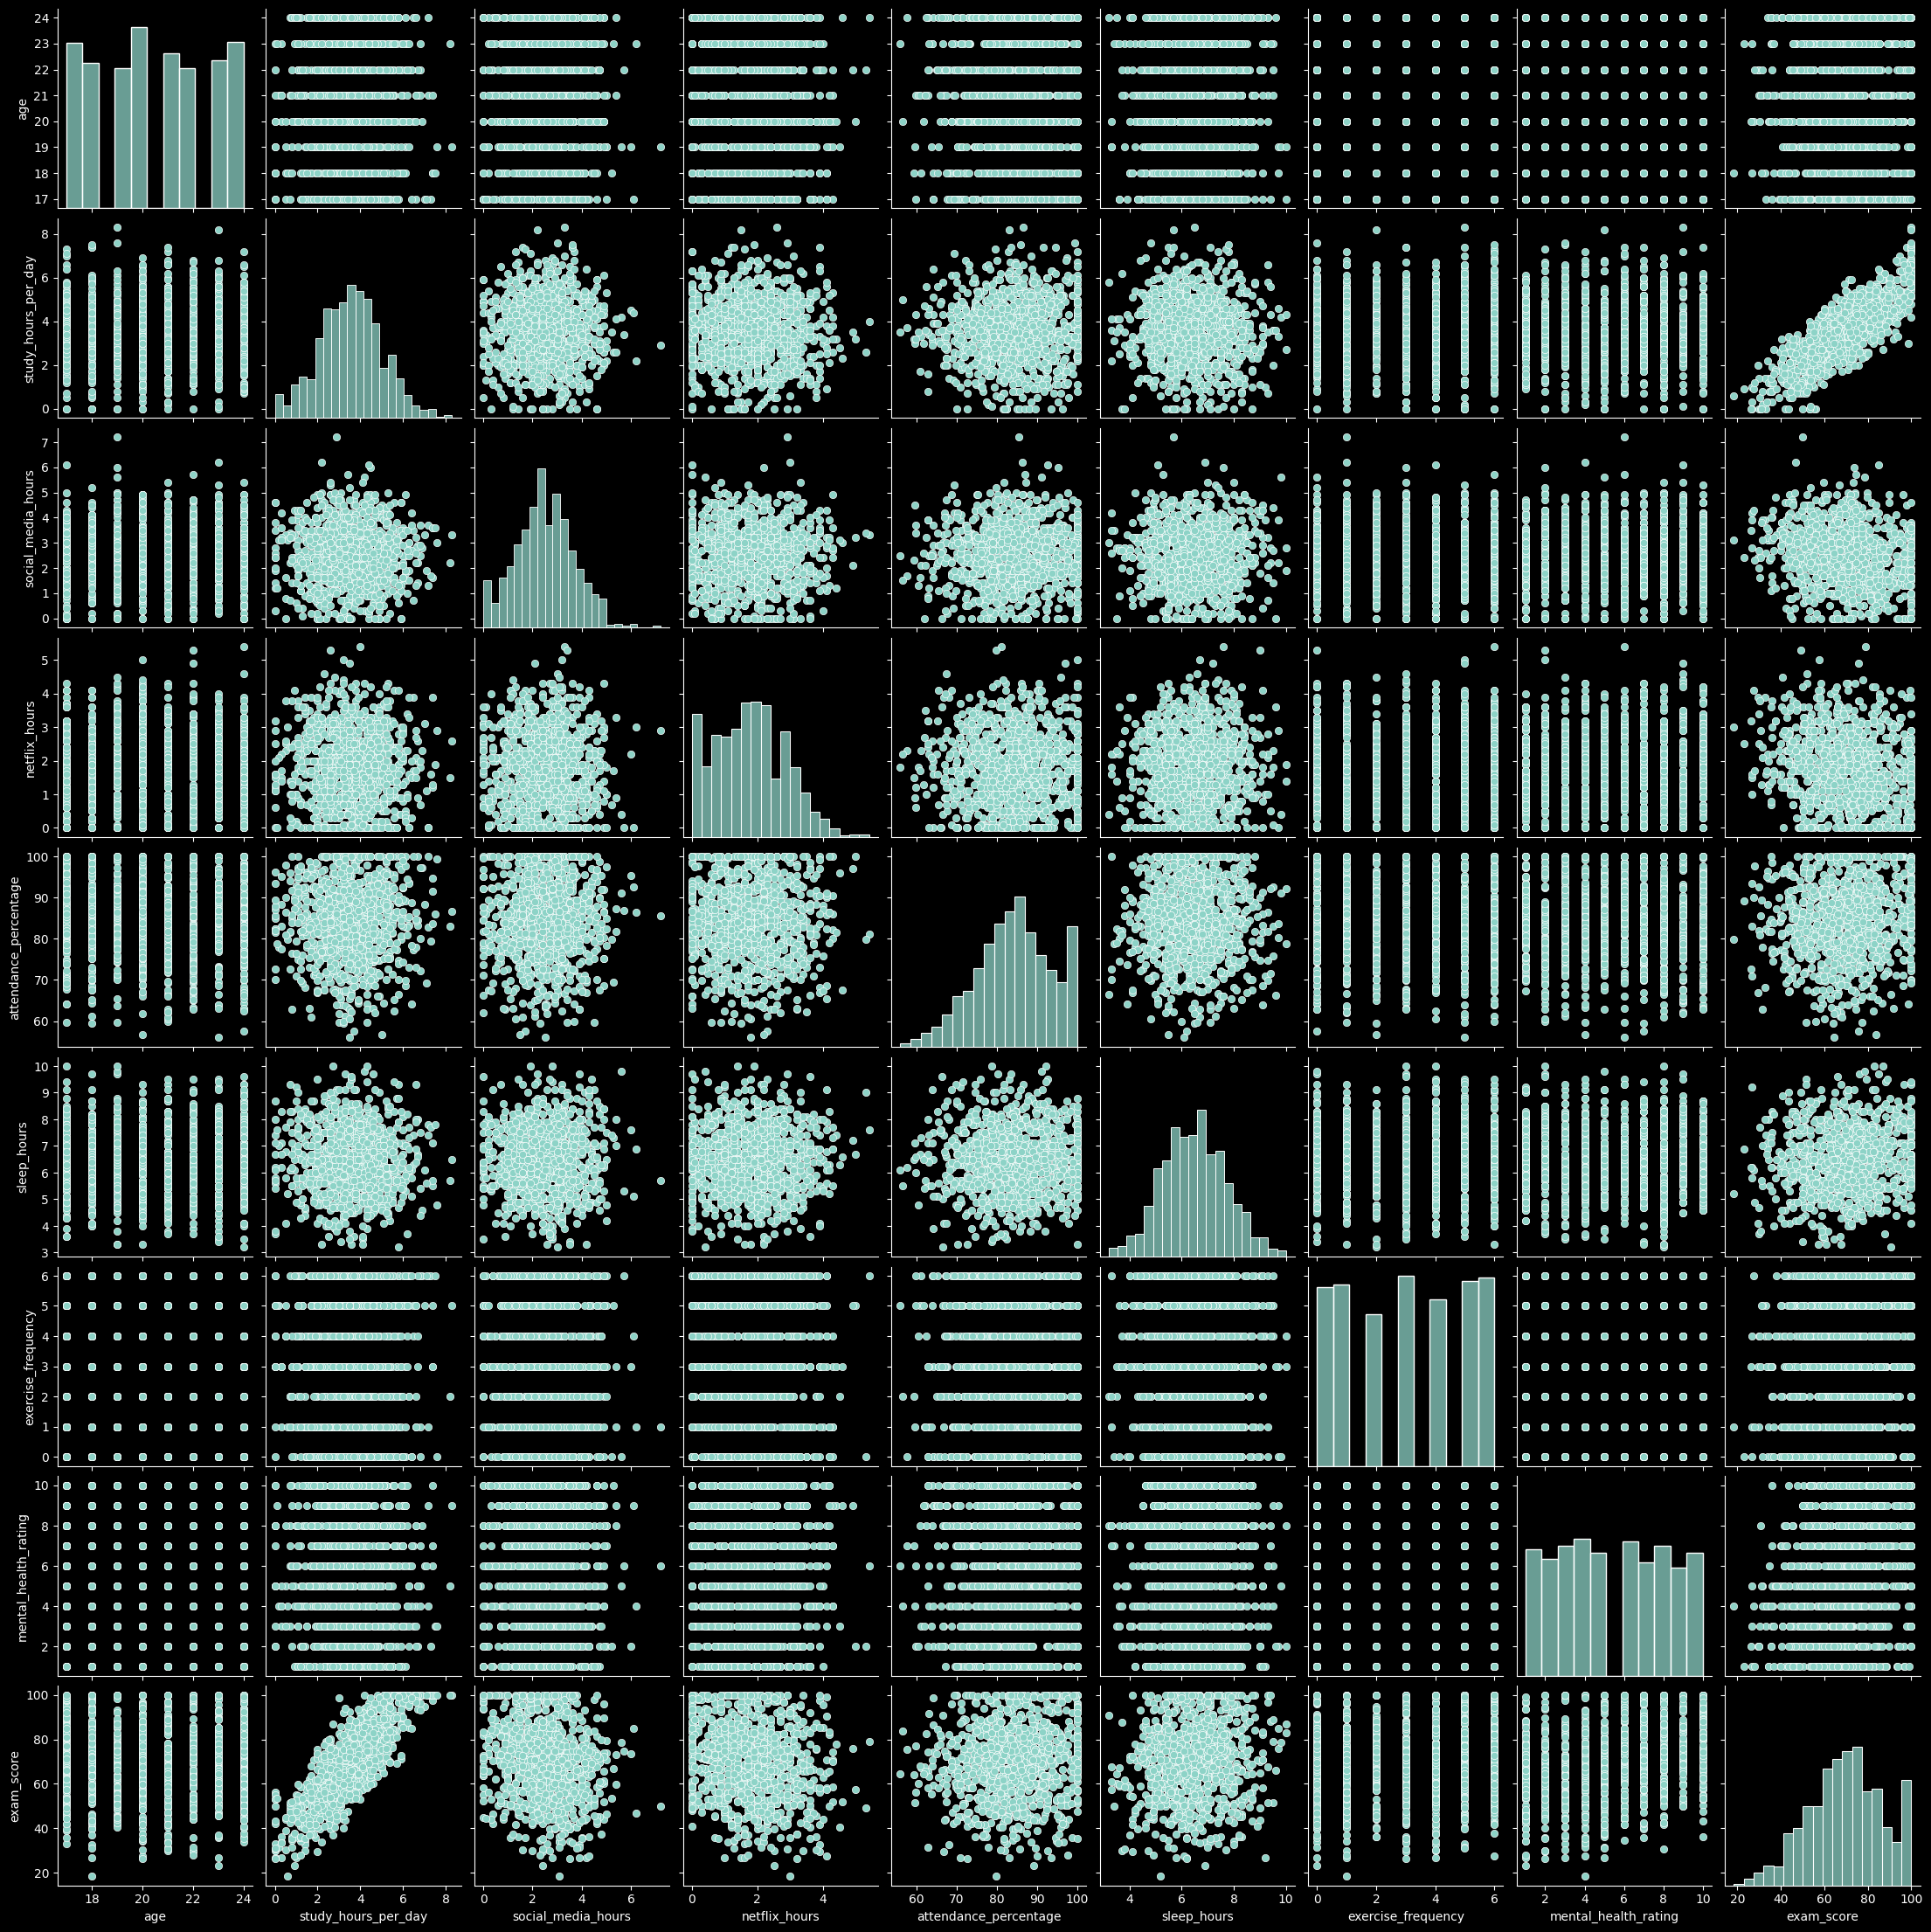

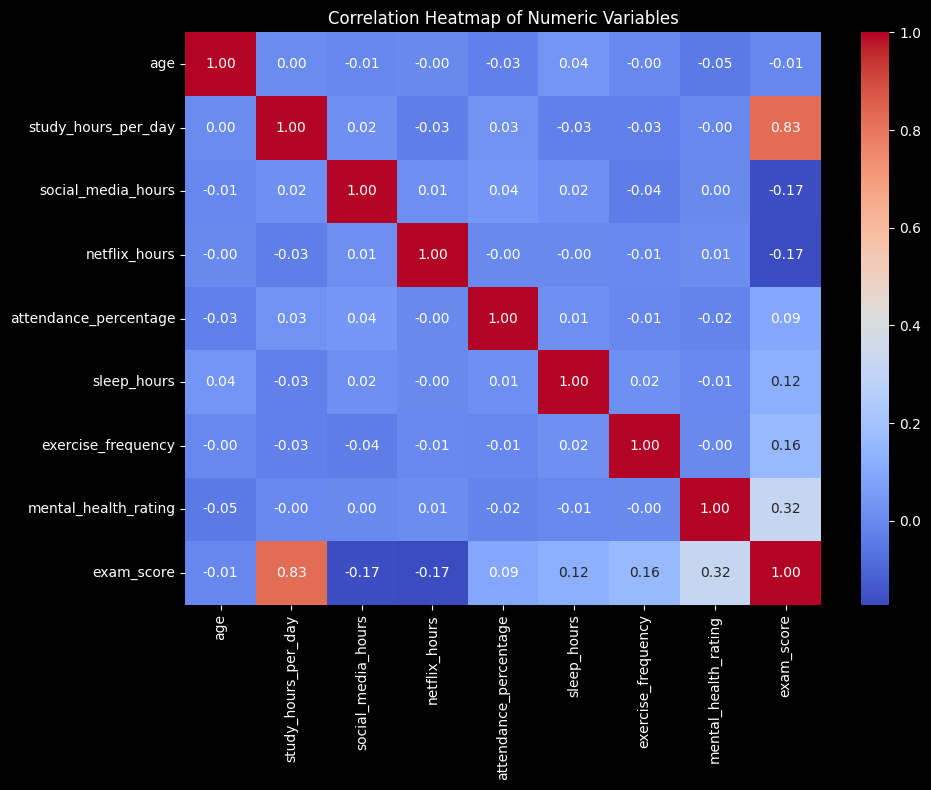

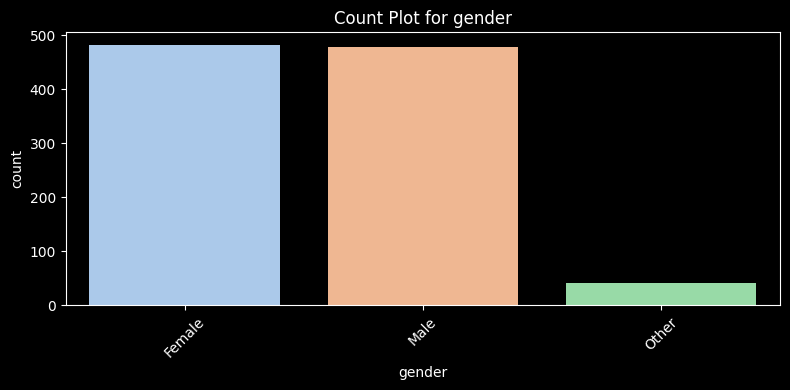

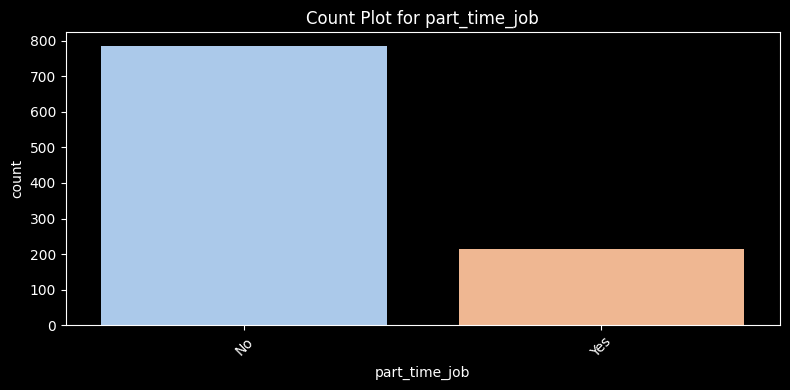

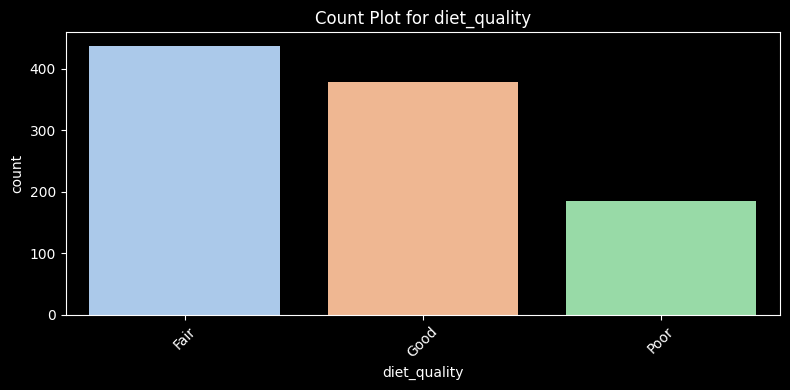

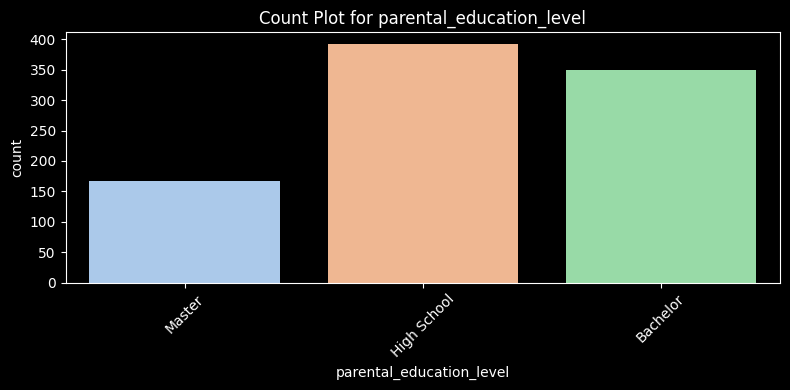

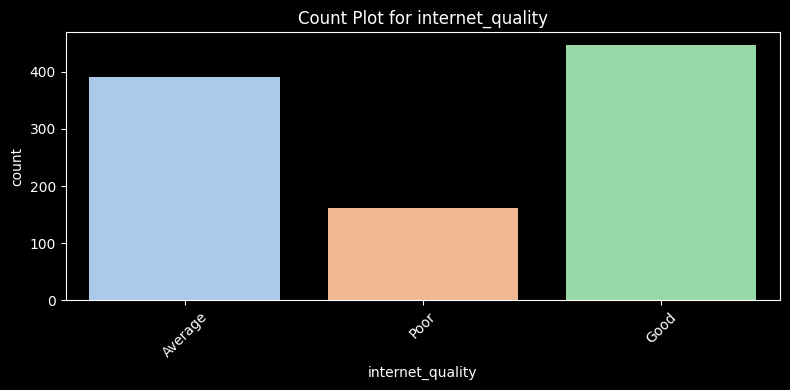

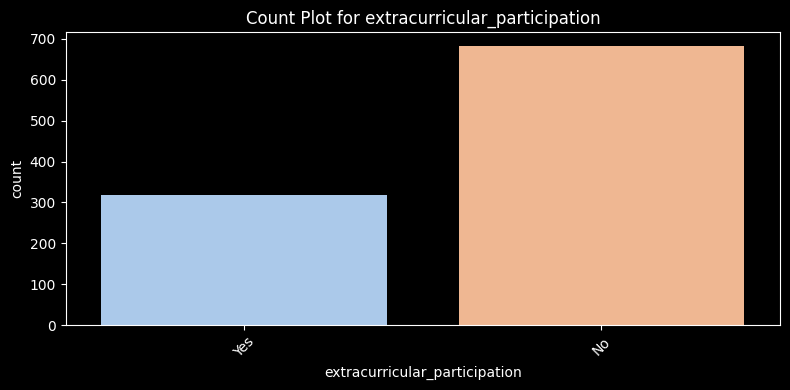

In [32]:
# Exploratory Data Analysis (EDA)
## Distribution of numerical features
numeric_columns = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
                   'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Pair Plot to inspect potential relationships
sns.pairplot(df[numeric_columns])
plt.show()

## Correlation Heatmap if four or more numeric columns exist
if len(numeric_columns) >= 4:
    numeric_df = df[numeric_columns]
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.tight_layout()
    plt.show()

## Pie Chart (using count plot) for categorical variables
categorical_columns = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [33]:
print(df.dtypes)

student_id                         object
age                                 int64
gender                             object
study_hours_per_day               float64
social_media_hours                float64
netflix_hours                     float64
part_time_job                      object
attendance_percentage             float64
sleep_hours                       float64
diet_quality                       object
exercise_frequency                  int64
parental_education_level           object
internet_quality                   object
mental_health_rating                int64
extracurricular_participation      object
exam_score                        float64
study_hours_bin                  category
dtype: object


In [34]:
# Data Cleaning and Preprocessing
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print('Missing values in each column:')
display(missing_values)

# If missing values exist, this method can be applied:
# For numerical columns, one may consider filling missing values with the mean or median.
# For categorical columns, filling with the mode might be appropriate.

# Here we show an example: (uncomment if necessary)
# for col in df.columns:
#     if df[col].dtype in ['float64', 'int64']:
#         df[col].fillna(df[col].mean(), inplace=True)
#     else:
#         df[col].fillna(df[col].mode()[0], inplace=True)

# Convert categorical variables using one-hot encoding
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Quick look at the new dataframe
print('Shape of dataframe after encoding:', df_encoded.shape)
display(df_encoded.head())

# Note for future reference: Users may encounter encoding issues when categorical data have unexpected values.
# In such cases, verifying the unique values in each column is essential before encoding.

Missing values in each column:


,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


Shape of dataframe after encoding: (1000, 21)


,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,...,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
0,S1000,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,...,False,False,False,False,False,False,True,False,False,True
1,S1001,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,...,False,False,False,True,False,True,False,False,False,False
2,S1002,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,...,True,False,False,False,True,True,False,False,True,False
3,S1003,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,...,False,False,False,False,True,False,True,True,False,True
4,S1004,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,...,False,False,False,False,False,False,True,True,False,False


R2 Score: 0.848
Mean Squared Error: 38.998


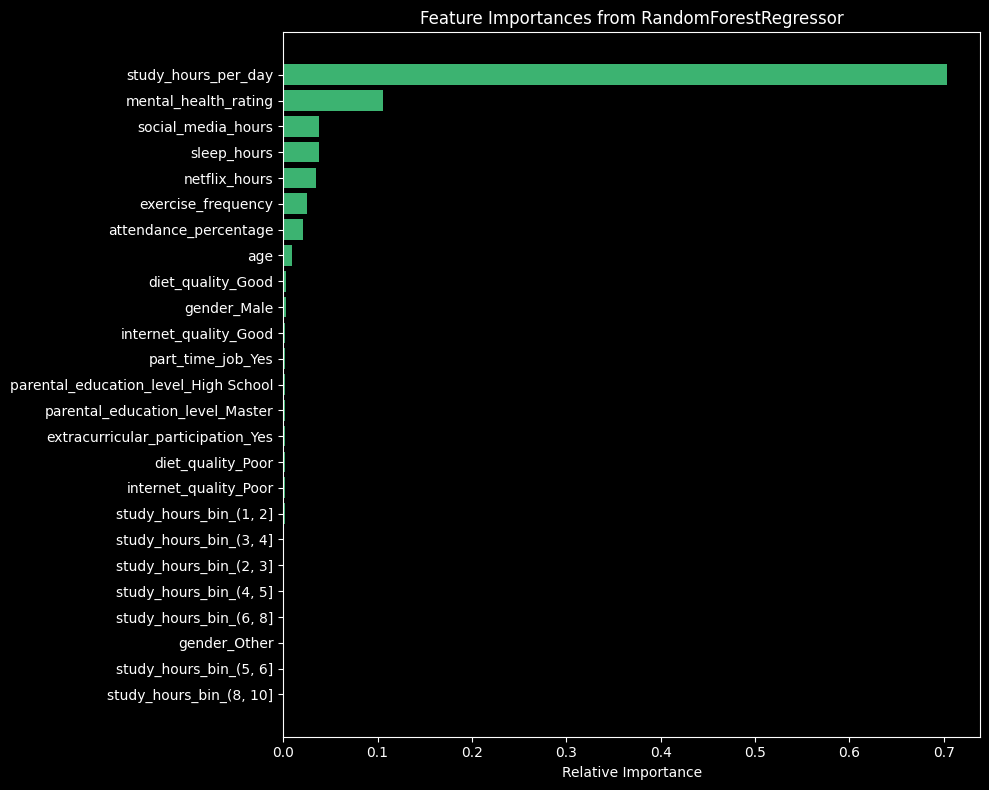

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загружаем данные (предположим, что df уже загружен)
X = df.drop(['student_id', 'exam_score'], axis=1)
y = df['exam_score']

# Преобразуем категориальные столбцы в числовые (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Теперь ошибки не будет!

# Предсказания и оценка
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2 Score: {r2:.3f}')
print(f'Mean Squared Error: {mse:.3f}')

# Визуализация важности признаков
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center', color='mediumseagreen')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances from RandomForestRegressor')
plt.tight_layout()
plt.show()

Исходя из проведенного анализа данных можно сделать вывод какие из привычек студентов сильнее влияют на экзаменационные итоги:
1. Качество диеты не влияет на результат. Как и другие показатели в темной зоне на тепловой карте.
2. Влияет ментальное (психическое состояние) на результат, чем выше показатель ментального здоровья - тем выше оценки.
3. Небольшое влияние оказывают часы проведенные в netflix, социальных сетях, количество часов сна.
4. Самое сильное влияние оказывает показатель (привычка) количество часов учебы. Чем больше часов, тем выше бал оценки за экзамен.